# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

# Always good to do some exploration of the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


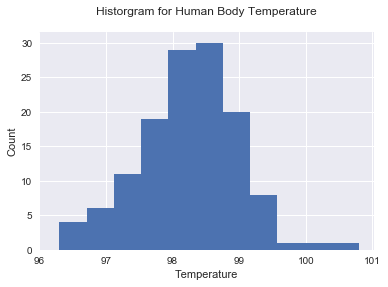

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

# set number of bins for the histogram

# general rule is square root of data points
n_bins = int(np.sqrt(len(df['temperature'])))

# bin edges can also be given
#n_bins = [95.5,96,96.5,97,97.5,98,98.5,99,99.5,100,100.5,101,101.5]

plt.hist(df['temperature'],bins=n_bins)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.xticks(range(96,102))
plt.title('Historgram for Human Body Temperature\n')

plt.show()

From the above plot we see that most max and min of temperatures. And also that most of the data is concentrated in the 98 to 99 range.

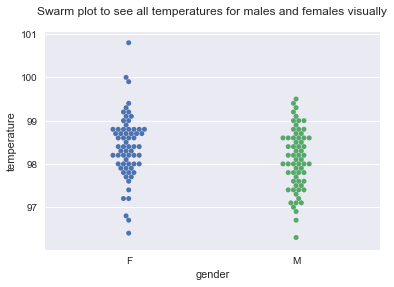

In [6]:
# some drawbacks of Histograms is that we loose some information as we are forcing the data into bins
# we can have binning bias with inappropriate bin sizes

# to capture all data let us draw swarm plots

sns.swarmplot(x='gender',y='temperature', data=df)
plt.title('Swarm plot to see all temperatures for males and females visually\n')

plt.show()

Here we see that there is more variation in Females as compared to Males. And again most data lies in 97 to 99 range.

In [7]:
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode(connected=True)

box = go.Box(x=list(df.temperature),boxpoints='all',name='Temperature')
data = [box]
fig = go.Figure(data=data)
offline.iplot(fig)


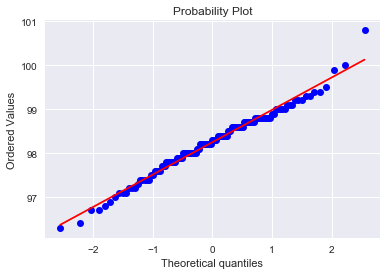

In [8]:
import pylab 
import scipy.stats as stats

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

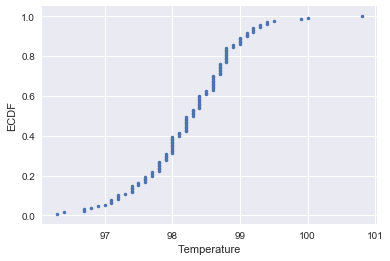

In [9]:
# Now let us draw ECDF chart for some more insights

# number of data points
n = len(df['temperature'])

# ECD empirical cumulative distribution of temperature
y = np.arange(1,n+1)/n
x = np.sort(df['temperature'])

plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('ECDF')

plt.show()

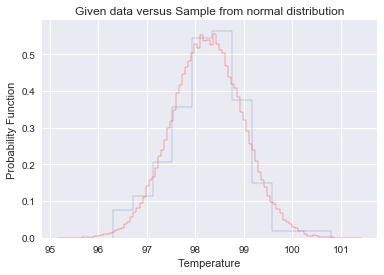

In [10]:
# Let us plot assume that the sample data is indeed from a normal distribution. We will use the sample mean and std
# to estimate the normal population parameters

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

samples = np.random.normal(mean,std,100000)

plt.hist(samples,bins=100,normed=True,histtype='step',color='red')
plt.hist(df['temperature'],bins=11,histtype='step',normed=True)
plt.xlabel('Temperature')
plt.ylabel('Probability Function')
plt.title('Given data versus Sample from normal distribution')

plt.show()

The historgram for the given data looks to be close to normal distribution. But we should do more analysis before drawing any conclustion.

In [11]:
# ECDF function to draw ecdf curve for any given data

def ecdf(data):
    # number of data points
    n = len(data)

    # ECD empirical cumulative distribution of temperature
    y = np.arange(1,n+1)/n
    x = np.sort(data)
    return (x,y)

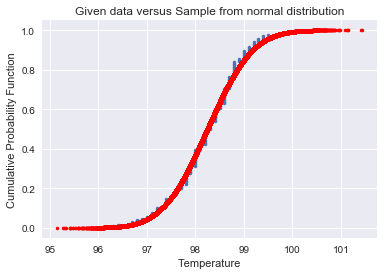

In [12]:
# draw ECDF for given data and sample from normal distribution

x,y = ecdf(df['temperature'])
plt.plot(x,y,marker='.',linestyle='none')

a,b = ecdf(samples)
plt.plot(a,b,marker='.',linestyle='none',color='red')

plt.xlabel('Temperature')
plt.ylabel('Cumulative Probability Function')
plt.title('Given data versus Sample from normal distribution')

plt.show()

**Is the distribution of body temperatures normal?**  

**Is the sample size large? Are the observations independent?**

The cumulative density function for the given data is very close to normally distributed data. This tells strongly that the Human Body Temperature is nomrally distributed.

The Central Limit Theorem states that the distribution of sample mean is approximately normal. The approximation can be poor if the sample size is small, but it improves with larger sample sizes.

After all the analysis we can conclude that the mean Human body temperature is nearly normally distributed. Here is the evidence:
1. The sample oberservations are independent. Since the population is all the humans. And our sample observations are far less that 10% of the population, we can say that they are independent.

2. The sample size is large: n>=30 is a good rule of thumb. Here our sample size is 130.

3. The sample is not strongly skewed. So we can make a guess that population is also not strongly skewed. However, we can't be 100% sure. But that's our assumption.

**Bootstrap Hypothesis Test**

In [13]:
# bootstrap hypothesis test
# Since we dont have multiple samples and we want to draw conclusions about the population parameters, we can utilize
# bootstrap sampling. Basic method involves taking random samples from the one given sample. And finding out the 
# confidence interval for the population parameter

# select a random value from the given sample
sample_size = len(df['temperature'])
bs_val = np.random.choice(df['temperature'],replace=True,size=sample_size)
np.mean(bs_val)

98.298461538461538

In [14]:
bs_val

array([  98.3,   97.9,   97.8,   98.8,   98. ,   98. ,   98. ,   99.4,
         97.8,   97.6,   98.2,   98.9,   98.4,   98.7,   98. ,   98. ,
         97.4,   98.4,   98.6,   97.7,   99. ,   98.7,   98.7,   97.6,
         98.6,   98.3,   96.7,   98.4,   97.4,   98.7,   98.1,   99.2,
         98.7,   98.3,   98.4,   97.4,   98.9,   97.2,   98.8,   96.8,
         98.4,   98.6,   99.4,   98.2,   99.2,   98.3,   99.4,   98.8,
         98.4,   98.4,   98.4,   98.4,   98.6,   98. ,   98. ,   99.9,
         98.7,   97.4,   98.8,   98.8,   98.2,   98.4,   98.3,   99. ,
         98.2,   97.1,   99. ,   98.8,   98.8,   97.4,   99.2,   97.9,
         98.2,   97.2,   96.3,   97. ,   98.6,   98.7,   98.1,   99.2,
         97. ,   98.6,   99.1,   98.8,   97.7,   98.4,   99.5,   99. ,
         98.9,   99.3,   96.7,   98.1,   98.8,   99.3,   98. ,   98.5,
         98.8,   97.8,   98.6,   98. ,   98.3,   99. ,   98.2,   99. ,
        100. ,   97.5,   99.2,   97.9,   98. ,   98.3,   97.9,   97.3,
      

In [15]:
def bs_statistic(data, func, size):
    bs_sample_stats = np.empty(size)
    for i in range(size):
        bs_val = np.random.choice(data,replace=True,size=sample_size)
        bs_sample_stats[i] = func(bs_val)
    return bs_sample_stats

In [16]:
bs_sample_stat = bs_statistic(df['temperature'],np.mean,10000)
# 95% confidence limit
np.percentile(bs_sample_stat,[2.5,97.5])

array([ 98.12692308,  98.37692308])

In [17]:
# 99% confidence limit
np.percentile(bs_sample_stat,[0.5,99.5])

array([ 98.08845769,  98.41692308])

In [18]:
# The true population mean of 98.6 degrees F doesn't fit in the 99% confidence interval.
# Let us do further hypothesis testing to find out

# Our sample mean is 98.25. If the true population mean is 98.6 then what are the chances that we will get such
# extreme value of 98.25?

# Let us test the null hypothesis that true mean is 98.6 F.
# Shift the sample values assuming that 98.6 F is true mean. And since the sample is close to normal we can assume
# that the population std can be estimated by sample std.

sample = df['temperature']
sample_mean = np.mean(sample)
shifted_sample = sample - sample_mean + 98.6
print(shifted_sample[0:5])


0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64


In [19]:
bs_shifted_sample_stat = bs_statistic(shifted_sample,np.mean,10000)

In [20]:
# Calculate the p value
p = np.sum(bs_shifted_sample_stat<=98.25)/len(bs_shifted_sample_stat)
p

0.0

The above p value of 0 strongly suggests that the population mean is not 98.6. Because it was true then the chance of getting the sample mean of 98.25 is 0.


**Frequentist Tests**

Frequentist statistical testing.
Statistical hypothesis test involves making a null hypothesis about our data assuming that nothing interesting 
is going on. 
The purpose of the hypothesis test is to determine whether its true given the sample data. If there 
is little data against the null hypothesis we accept it. Else we reject it in favor of alternate hypothesis.

Null hypotheis: The true population mean is 98.6$^{\circ}$F

            H0: μ−98.6=0
            
Alternative hypothesis: The true population mean is not 98.6$^{\circ}$F

            H1: μ−98.6<>0
            
Significance Level: 99.9% Confidence

            α=0.01

In [21]:
# To test the above Null Hypothesis we can apply T or Z tests.
# In this situaion a Z test is more appropriate because 
        # 1.the sample is bigger than 30
        # 2.the data in sample are independent

In [22]:
from scipy import stats

In [23]:
# Let us do the Z test first

def do_z_test(sample):
    # mean of sample
    mean =  np.mean(sample)

    # population standard deviation estimate
    sigma = np.std(sample)/np.sqrt(len(sample))

    # calculate the z score of the sample mean
    z = (mean - 98.6)/sigma
    print('z score of sample mean is :', z)

    p = stats.norm.cdf(z)*2
    print('p value: ', p)

    # z_critical for chose alpha
    z_critical = stats.norm.ppf(q = 0.9995)
    #print('z_critical value: ', z_critical)

    # margin of error for chose alpha
    me = z_critical * sigma
    #print('margin of error: ', me)

    # confidence interval
    #conf_interval = (mean-me, mean+me)
    conf_interval = stats.norm.interval(alpha=0.95,loc=mean,scale=sigma)
    print('confidence interval: ', conf_interval)
    
do_z_test(df.temperature)

z score of sample mean is : -5.47592520208
p value:  4.35231516588e-08
confidence interval:  (98.123682111456645, 98.37477942700491)


Above values suggests that the chance to get such an extreme value as our sample mean if the Null Hypothesis was true is very close to 0 (4.35 e-08). So we can reject the Null Hypothesis.

In [24]:
# Let us now do T test
# calculate the z score of the sample mean

def do_t_test(sample):
    # mean of sample
    mean =  np.mean(sample)

    # population standard deviation estimate
    sigma = np.std(sample)/np.sqrt(len(sample))
    
    t,p = stats.ttest_1samp(sample,98.6)
    print('t statistic of one sample T test: ', t)
    print('p value for one sample T test: ', p)

    # degrees of freedom
    dof = len(sample) - 1
    
    # t_critical for chose alpha
    t_critical = stats.t.ppf(q = 0.9995,df=dof)
    #print('t_critical value: ', z_critical)

    # margin of error for chose alpha
    me = t_critical * sigma
    #print('margin of error: ', me)

    # confidence interval
    # conf_interval = (mean-me, mean+me)
    conf_interval = stats.t.interval(alpha=0.999, df=dof, loc= mean, scale= sigma)
    print('confidence interval: ', conf_interval)
    
do_t_test(df.temperature)

t statistic of one sample T test:  -5.45482329236
p value for one sample T test:  2.41063204156e-07
confidence interval:  (98.033517143547087, 98.464944394914468)


There is not much difference between the Z and T test results. Theoretically also, we know that when the sample size is greater than 30 than the T distribution becomes more like Normal distribution. The confidence interval is wider for Z test as it is more lenient and less confident of the results. When we have more a big sample size its better to use Z test confidence interval to give more accurate picture.

**Frequentist tests for sample size of 10**

In [25]:
# Draw a smaller sample of size 10 from the original sample
np.random.seed(seed=42)
small_sample = np.random.choice(df.temperature, size=10)
print('small sample of size 10: ', small_sample)

small sample of size 10:  [ 98.   98.8  97.8  97.   97.7  98.3  98.   97.9  99.   98. ]


In [26]:
# Do the Z test for smaller sample of size 10
do_z_test(small_sample)

z score of sample mean is : -3.26078041701
p value:  0.0011110604539
confidence interval:  (97.719410370022359, 98.380589629977635)


In [27]:
# Do the T test for smaller sample of size 10
do_t_test(small_sample)

t statistic of one sample T test:  -3.09344792023
p value for one sample T test:  0.0128577046048
confidence interval:  (97.243597364438273, 98.856402635561736)


There is some difference between the Z and T test results. Again, the confidence interval is wider for Z test as it is more lenient and less confident of the results. Since we have small sample size in this case, its better to use T test confidence interval with bigger range.

**What temperature can be considered "abnormal"**

To judge between a normal and abnormal temperature, we need to find a range of normal temperatures. From our previous analysis we saw that our sample data is approximately normal. So we can find the 95% confidence interval for that nomral distribution and that would be our normal human body temperature. Anything outside that temperature would be abnormal.

In [28]:
# mean and std for our normal distribution based on given sample
mean = np.mean(df.temperature)
std = np.std(df.temperature)

# margin of error
z_critical = stats.norm.ppf(q = 0.975)
moe = z_critical * std
print('margin of error: ', moe)
print('confidence interval from margin of error is (mean-moe,mean+moe): ', (mean-moe,mean+moe))

# 95% confidence interval using stats lib
ci = stats.norm.interval(alpha=0.95,loc=mean,scale=std)
print('\nany temperature outside the range of ',ci,'is abnormal')

margin of error:  1.43147494248
confidence interval from margin of error is (mean-moe,mean+moe):  (96.81775582674824, 99.680705711713316)

any temperature outside the range of  (96.81775582674824, 99.680705711713316) is abnormal


**Difference between males and females in normal temperature**

In [29]:
# Let us see the cdfs of the female and male samples

In [30]:
plt.hist(male_sample,histtype='step',color='blue')
plt.hist(female_sample,histtype='step',color='red')

NameError: name 'male_sample' is not defined

In [ ]:
plt.show()

In [ ]:
x_f,y_f = ecdf(female_sample)
plt.plot(x_f,y_f,marker='.',linestyle='none',color='red')

x_m,y_m = ecdf(male_sample)
plt.plot(x_m,y_m,marker='.',linestyle='none',color='blue')

plt.show()

Our Null hypothesis to test out is that the male and female population temperatures are same. Against the alternate hypothesis that they are different.

**Frequentist Test**

Calculate the T-test for the means of two independent samples of male and female temperatures.

We can use this test, if we observe two independent samples from the same or different population. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [ ]:
# difference between male and female temperatures
male_sample = df.temperature[df.gender=='M']
female_sample = df.temperature[df.gender=='F']

In [ ]:
stats.ttest_ind(a=male_sample,b=female_sample)

Here the pvalue is less than 0.05. So we can reject the null hypothesis that male and female temperatures are same.

**Bootstrap Test**

In [ ]:
def perm_statistic(data, func, size):
    ps_sample_stats = np.empty(size)
    length = int(len(data)/2)
    
    for i in range(size):
        data = np.random.permutation(data)
        sample1 = data[0:length]
        sample2 = data[length:]
        ps_sample_stats[i] = func(sample1) - func(sample2)
    return ps_sample_stats

In [ ]:
np.random.seed(42)
ps_sample_stats = perm_statistic(df.temperature, np.mean, 10000)
conf_int = np.percentile(ps_sample_stats,[2.5,97.5])
print('95% confidence interval for mean of differences: ', conf_int )

In [ ]:
mean_diff = np.mean(female_sample) - np.mean(male_sample)
mean_diff

In [ ]:
# calculate p value
p = np.sum(ps_sample_stats >= mean_diff)/len(ps_sample_stats)
p

Again, the pvalue is less than 0.01 and close to 0. So we can reject the null hypothesis that male and female temperatures are same.

With all the data analysis it is clear that women have slightly higher average temperature than men.